<a href="https://colab.research.google.com/github/raflialthoriq141/Human-Activity/blob/main/LatGis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, datasets,read_file
import zipfile
import osD

In [ ]:
zip='aceh.zip'
#-- list semua file .shp dalam zip --
with zipfile.ZipFile(zip, 'r') as myzip:
    #-- shp_files=[f for f in myzip.namelist() if f.endswith('.shp')]
    shp_files = [f for f in myzip.namelist() if f.endswith('.shp') and not '/__MACOSX/' in f and not '._' in f]
print(shp_files)

#-- membaca setiap shapefile ke dalam GeoDataFrame
gdfs={}
for shp in shp_files:
  #-- format: zip://path/to/zipfile.zip!namafile.shp
  gdf=gpd.read_file(f"zip://{zip}!{shp}")
  gdfs[shp]=gdf
#-- contoh tampilan data dari salah satu shapefile --
print(gdfs[shp_files[0]].head())


['BATAS_DESA_DESEMBER_2019_DUKCAPIL_ACEH.shp']
   OBJECT_ID  ...                                           geometry
0       24.0  ...  POLYGON ((97.4767 2.93545, 97.48346 2.93328, 9...
1       26.0  ...  POLYGON ((97.4767 2.93545, 97.47282 2.94642, 9...
2      102.0  ...  POLYGON ((97.09457 3.43455, 97.08767 3.43208, ...
3       33.0  ...  MULTIPOLYGON (((97.31123 3.11865, 97.31261 3.1...
4       34.0  ...  POLYGON ((97.34582 3.1338, 97.34865 3.13111, 9...

[5 rows x 162 columns]


<Axes: >

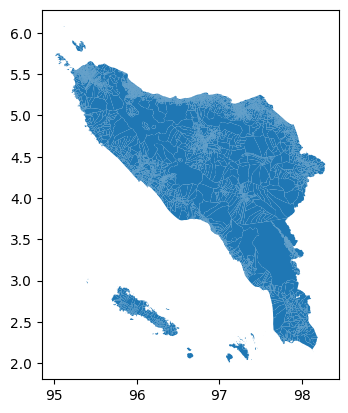

In [ ]:
gdfs['BATAS_DESA_DESEMBER_2019_DUKCAPIL_ACEH.shp'].plot()

**Menggunakan Banyak SHP**

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, datasets,read_file
import zipfile
import os

In [ ]:
zip1='Archive.zip'
#-- Lihat semua file yang ada shpnya --
with zipfile.ZipFile(zip1,'r') as myzip:
  #-- shp_file=[f for f in myzip.namelist() if f.endswith('.shp')]
  shp_files = [f for f in myzip.namelist() if f.endswith('.shp') and not '/__MACOSX/' in f and not '._' in f]
print(shp_files)

#-- Membaca setiap shapefile ke dalam GeodataFrame --
gdfs={}
for shp in shp_files:
  #-- format: zip://path/to/zipfile.zip!namafile.shp
  gdf=gpd.read_file(f"zip://{zip1}!{shp}")
  gdfs[shp]=gdf
print(gdfs[shp_files[0]].head())

['ADMINISTRASI_LN_50K.shp', 'ADMINISTRASIKECAMATAN_AR_50K.shp']
   KARKTR  ...                                           geometry
0       0  ...  LINESTRING Z (97.04647 5.24146 0, 97.04637 5.2...
1       0  ...  LINESTRING Z (97.14787 5.15211 0, 97.14798 5.1...
2       0  ...  LINESTRING Z (97.13359 5.17511 0, 97.13327 5.1...
3       0  ...  LINESTRING Z (97.11511 5.19866 0, 97.11497 5.1...
4       0  ...  LINESTRING Z (97.07916 5.15859 0, 97.07932 5.1...

[5 rows x 27 columns]


<Axes: >

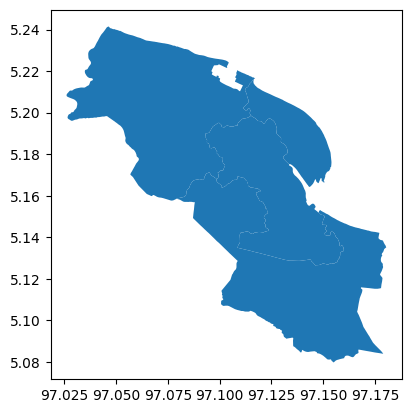

In [ ]:
gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp'].plot()

In [ ]:
for shp, gdf in gdfs.items():
    #print(f"\n--- {shp} ---")
    print(gdf.head())

   KARKTR  ...                                           geometry
0       0  ...  LINESTRING Z (97.04647 5.24146 0, 97.04637 5.2...
1       0  ...  LINESTRING Z (97.14787 5.15211 0, 97.14798 5.1...
2       0  ...  LINESTRING Z (97.13359 5.17511 0, 97.13327 5.1...
3       0  ...  LINESTRING Z (97.11511 5.19866 0, 97.11497 5.1...
4       0  ...  LINESTRING Z (97.07916 5.15859 0, 97.07932 5.1...

[5 rows x 27 columns]
  KDPPUM  ...                                           geometry
0   None  ...  POLYGON Z ((97.13359 5.17511 0, 97.13327 5.175...
1   None  ...  POLYGON Z ((97.09851 5.16797 0, 97.09845 5.167...
2   None  ...  POLYGON Z ((97.13359 5.17511 0, 97.13349 5.175...
3   None  ...  POLYGON Z ((97.11641 5.21582 0, 97.11612 5.215...

[4 rows x 28 columns]


In [ ]:
print(shp_files)

['ADMINISTRASI_LN_50K.shp', 'ADMINISTRASIKECAMATAN_AR_50K.shp']


<Axes: >

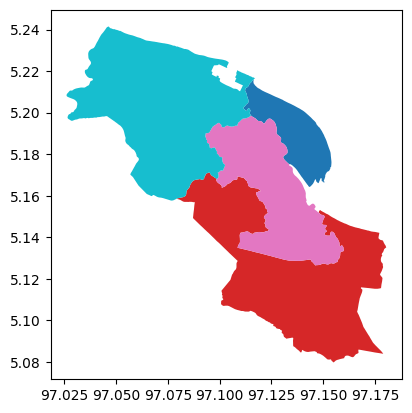

In [ ]:
gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp'].plot(column='NAMOBJ')

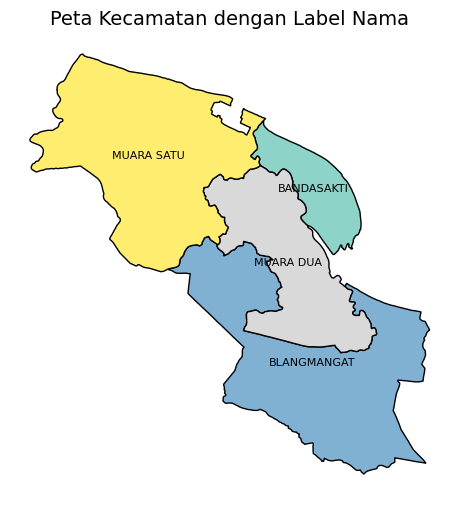

In [ ]:
import matplotlib.pyplot as plt

# Ambil GeoDataFrame kecamatan
gdf_kec = gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp']

# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot berdasarkan kolom NAMOBJ (misalnya nama kecamatan)
gdf_kec.plot(column='NAMOBJ', cmap='Set3', edgecolor='black', ax=ax)

# Tambahkan label nama kecamatan di tengah polygon (centroid)
for idx, row in gdf_kec.iterrows():
    if row['geometry'].geom_type in ['Polygon', 'MultiPolygon']:
        plt.text(row['geometry'].centroid.x,
                 row['geometry'].centroid.y,
                 row['NAMOBJ'],
                 fontsize=8,
                 ha='center', va='center')

# Tambahkan judul dan hilangkan sumbu
plt.title("Peta Kecamatan dengan Label Nama", fontsize=14)
plt.axis('off')
plt.show()
